<a href="https://colab.research.google.com/github/Alyssasorensen/datasci_4_web_viz/blob/main/datasci_4_web_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Python's Shiny Visualization

In [2]:
!pip install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.4 MB/s eta 0:00:00


In [3]:
!pip install ipywidgets jupyter_contrib_nbextensions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.5/23.5 MB 31.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 466.9/466.9 kB 45.9 MB/s eta 0:00:00
  Created wheel for jupyter_contrib_nbextensions: filename=jupyter_contrib_nbextensions-0.7.0-py2.py3-none-any.whl size=23428781 sha256=7ab756f3e33a9dce4437135ea9b06a21ea017d06f955362b4f20c6aa3c5e2abd
  Stored in directory: /root/.cache/pip/wheels/ea/cc/7d/99ef154f984726b1201c0f72cfe9c9d7c5132c1a2ae4d8677f
  Created wheel for jupyter_contrib_core: filename=jupyter_contrib_core-0.4.2-py2.py3-none-any.whl size=17484 sha256=28b37019b4c0822e6ec58ffe7d2473d724f51b3db557c5ed58a2d2052d35518f
  Stored in directory: /root/.cache/pip/wheels/a9/52/88/e0643cdfd68f0562087918c37dd583378648dbc3df68b907f7
Successfully built jupyter_contrib_nbextensions jupyter_contrib_core


In [4]:
!pip install shiny

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.0/80.0 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.6 MB/s eta 0:00:00


In [5]:
from shiny import App, render, ui
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets  # Import ipywidgets

In [6]:
# Fetch the data
url = "https://raw.githubusercontent.com/Alyssasorensen/datasci_4_web_viz/main/datasets/PLACES__Local_Data_for_Better_Health__County_Data_2023_release%20(1).csv"
df = pd.read_csv(url)
df.columns

Index(['Year', 'StateAbbr', 'StateDesc', 'LocationName', 'DataSource',
       'Category', 'Measure', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'Low_Confidence_Limit', 'High_Confidence_Limit', 'TotalPopulation',
       'LocationID', 'CategoryID', 'MeasureId', 'DataValueTypeID',
       'Short_Question_Text', 'Geolocation', 'Counties'],
      dtype='object')

In [7]:
# Filter for 'OBESITY' as measureid and 'Crude prevalence' as data_value_type
df = df[(df['MeasureId'] == 'OBESITY') & (df['Data_Value_Type'] == 'Crude prevalence')]
df

,Year,StateAbbr,StateDesc,LocationName,DataSource,Category,Measure,Data_Value_Unit,Data_Value_Type,Data_Value,...,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,LocationID,CategoryID,MeasureId,DataValueTypeID,Short_Question_Text,Geolocation,Counties
0,2021,AL,Alabama,Dallas,BRFSS,Health Outcomes,Obesity among adults aged >=18 years,%,Crude prevalence,44.3,...,36.8,52.2,37619,1047,HLTHOUT,OBESITY,CrdPrv,Obesity,POINT (-87.11436 32.3335263),1542
149,2021,AL,Alabama,Franklin,BRFSS,Health Outcomes,Obesity among adults aged >=18 years,%,Crude prevalence,39.1,...,31.2,47.8,32013,1059,HLTHOUT,OBESITY,CrdPrv,Obesity,POINT (-87.8428144 34.4419892),99
196,2021,AL,Alabama,Sumter,BRFSS,Health Outcomes,Obesity among adults aged >=18 years,%,Crude prevalence,45.0,...,36.8,53.4,12164,1119,HLTHOUT,OBESITY,CrdPrv,Obesity,POINT (-88.2000571 32.5974811),105
367,2021,AL,Alabama,Washington,BRFSS,Health Outcomes,Obesity among adults aged >=18 years,%,Crude prevalence,41.8,...,34.1,50.1,15147,1129,HLTHOUT,OBESITY,CrdPrv,Obesity,POINT (-88.2124041 31.4085035),1641
664,2021,AL,Alabama,Bullock,BRFSS,Health Outcomes,Obesity among adults aged >=18 years,%,Crude prevalence,49.2,...,40.4,57.9,10320,1011,HLTHOUT,OBESITY,CrdPrv,Obesity,POINT (-85.7172613 32.1017589),93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4720,2021,AL,Alabama,Lawrence,BRFSS,Health Outcomes,Obesity among adults aged >=18 years,%,Crude prevalence,41.7,...,33.7,50.0,33090,1079,HLTHOUT,OBESITY,CrdPrv,Obesity,POINT (-87.3218651 34.529776),1585
4730,2021,AL,Alabama,Marion,BRFSS,Health Outcomes,Obesity among adults aged >=18 years,%,Crude prevalence,39.2,...,30.7,47.6,29246,1093,HLTHOUT,OBESITY,CrdPrv,Obesity,POINT (-87.881551 34.1382194),102
4853,2021,AL,Alabama,Fayette,BRFSS,Health Outcomes,Obesity among adults aged >=18 years,%,Crude prevalence,37.7,...,29.9,45.9,16148,1057,HLTHOUT,OBESITY,CrdPrv,Obesity,POINT (-87.7642923 33.7161568),1546
4902,2021,AL,Alabama,Pickens,BRFSS,Health Outcomes,Obesity among adults aged >=18 years,%,Crude prevalence,44.9,...,36.8,53.4,18801,1107,HLTHOUT,OBESITY,CrdPrv,Obesity,POINT (-88.0968644 33.2968003),1632


In [8]:
# Group by 'LocationName' and get the average (or sum) 'Data_Value'
grouped = df.groupby('LocationName').Data_Value.mean().sort_values(ascending=False)
grouped

LocationName
Greene        51.4
Perry         50.4
Bullock       49.2
Wilcox        47.9
Lowndes       47.3
              ... 
Limestone     37.2
Lauderdale    37.1
Cleburne      36.4
Marshall      34.7
Shelby        33.6
Name: Data_Value, Length: 67, dtype: float64

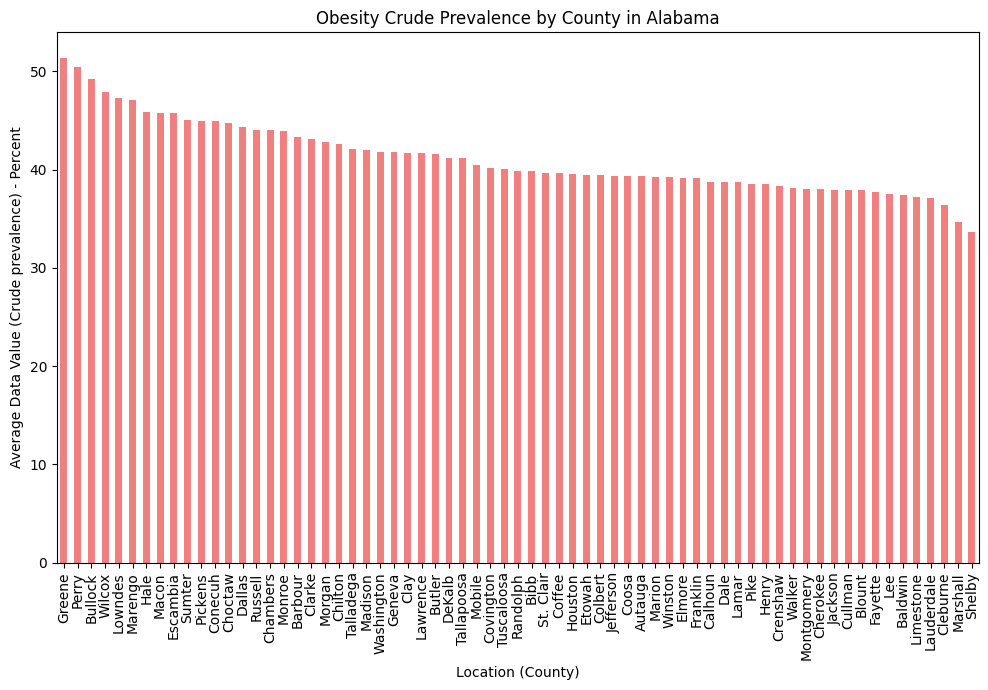

In [9]:
# Plotting
plt.figure(figsize=(10, 7))
grouped.plot(kind='bar', color='lightcoral')
plt.ylabel('Average Data Value (Crude prevalence) - Percent')
plt.xlabel('Location (County)')
plt.title('Obesity Crude Prevalence by County in Alabama')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("obesity_per_location.png")  # Saving the plot as an image
plt.show()

In [10]:
import ipywidgets as widgets

# Compute the average data value across all counties
avg_data_value = df['Data_Value'].mean()

# Sort the counties in ascending order for the dropdown list
sorted_counties = sorted(df['LocationName'].unique())

# Interactive selection of county for visualization using ipywidgets
@widgets.interact(County=sorted_counties)
def plot_data(County):
    county_value = df[df['LocationName'] == County]['Data_Value'].values[0]

    # Labels for bars
    labels = [County, 'Average across all counties']

    # Data values for bars
    values = [county_value, avg_data_value]

    plt.figure(figsize=(8, 6))

    # Plot the bars
    colors = ['lightcoral', 'lightblue']
    plt.bar(labels, values, color=colors)

    plt.ylabel('Data Value (Crude prevalence) - Percent')
    plt.title(f'Obesity Crude Prevalence in {County} vs Average across all counties')

    plt.tight_layout()
    plt.show()

interactive(children=(Dropdown(description='County', options=('Autauga', 'Baldwin', 'Barbour', 'Bibb', 'Blount…

### Python's Shiny Code Above Altogether

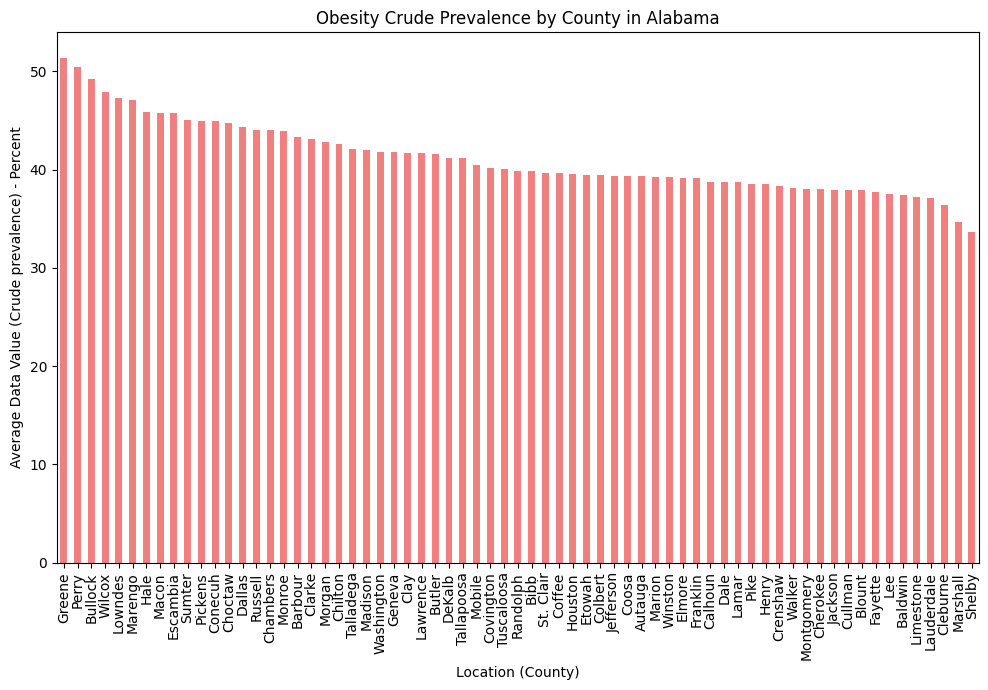

interactive(children=(Dropdown(description='County', options=('Autauga', 'Baldwin', 'Barbour', 'Bibb', 'Blount…

In [11]:
from shiny import App, render, ui
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets  # Import ipywidgets

# Load the dataset
def load_data():
    url = "https://raw.githubusercontent.com/Alyssasorensen/datasci_4_web_viz/main/datasets/PLACES__Local_Data_for_Better_Health__County_Data_2023_release%20(1).csv"
    return pd.read_csv(url)

df = load_data()

# Filter for 'OBESITY' as measureid and 'Crude prevalence' as data_value_type
df = df[(df['MeasureId'] == 'OBESITY') & (df['Data_Value_Type'] == 'Crude prevalence')]

# Group by 'LocationName' and get the average (or sum) 'Data_Value'
grouped = df.groupby('LocationName').Data_Value.mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 7))
grouped.plot(kind='bar', color='lightcoral')
plt.ylabel('Average Data Value (Crude prevalence) - Percent')
plt.xlabel('Location (County)')
plt.title('Obesity Crude Prevalence by County in Alabama')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("obesity_per_location.png")  # Saving the plot as an image
plt.show()

# Compute the average data value across all counties
avg_data_value = df['Data_Value'].mean()

# Sort the counties in ascending order for the dropdown list
sorted_counties = sorted(df['LocationName'].unique())

# Interactive selection of county for visualization using ipywidgets
@widgets.interact(County=sorted_counties)
def plot_data(County):
    county_value = df[df['LocationName'] == County]['Data_Value'].values[0]

    # Labels for bars
    labels = [County, 'Average across all counties']

    # Data values for bars
    values = [county_value, avg_data_value]

    plt.figure(figsize=(8, 6))

    # Plot the bars
    colors = ['lightcoral', 'lightblue']
    plt.bar(labels, values, color=colors)

    plt.ylabel('Data Value (Crude prevalence) - Percent')
    plt.title(f'Obesity Crude Prevalence in {County} vs Average across all counties')

    plt.tight_layout()
    plt.show()


## Flask with Matplotlib Visualization

In [12]:
from flask import Flask, render_template, request
import pandas as pd
import matplotlib
matplotlib.use('Agg') # required for local development and g-shell
import matplotlib.pyplot as plt
import io
import base64

In [13]:
import warnings
warnings.simplefilter("ignore", UserWarning)

In [14]:
app = Flask(__name__)

In [15]:
# Load the dataset
url = "https://raw.githubusercontent.com/Alyssasorensen/datasci_4_web_viz/main/datasets/PLACES__Local_Data_for_Better_Health__County_Data_2023_release%20(1).csv"
df = pd.read_csv(url)
df_obesity = df[(df['MeasureId'] == 'OBESITY') & (df['Data_Value_Type'] == 'Crude prevalence')]

In [16]:
@app.route('/', methods=['GET', 'POST'])
def index():
    counties = sorted(df_obesity['LocationName'].unique())
    selected_county = request.form.get('county') or counties[0]

    img = create_plot(selected_county)

    return render_template("index.html", counties=counties, selected_county=selected_county, img=img)

In [18]:
def create_plot(county):
    overall_avg = df_obesity['Data_Value'].mean()
    selected_county_avg = df_obesity[df_obesity['LocationName'] == county]['Data_Value'].mean()

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(['Selected County', 'Overall Average'], [selected_county_avg, overall_avg], color=['lightcoral', 'dodgerblue'])
    ax.axhline(selected_county_avg, color='gray', linestyle='dashed', alpha=0.7)
    ax.set_ylabel('Data Value (Crude prevalence) - Percent')
    ax.set_ylim(0, 60)
    ax.set_title('Obesity Crude Prevalence Comparison')
  # Convert plot to PNG image
    img = io.BytesIO()
    plt.savefig(img, format='png')
    img.seek(0)

    return base64.b64encode(img.getvalue()).decode()

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
